# This is Webscraping Project
#### (fetching products from ecommerce website)

## import required libraries.

In [1]:
import pandas as pd 
import numpy as np
import requests
from bs4 import BeautifulSoup
from PIL import Image
from io import BytesIO
import os

In [17]:
base = "https://www.urbansole.com.pk"
base_url = "https://www.urbansole.com.pk/collections/urbansole-footwear" #pagea=5

women_url = "https://www.urbansole.com.pk/collections/women" #pagea=1
kids_url = "https://www.urbansole.com.pk/collections/kids" #pagea=1

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

In [14]:
products_links=[]
for page in range(1, 6):
    page_contents=requests.get(base_url+f"?page={page}").content
    soup=BeautifulSoup(page_contents, 'html.parser')
    products_list = soup.find_all('li', class_="productgrid--item")
    for product in products_list:
        products_links.append(base+product.find('a', class_="productitem--image-link").get('href'))

In [40]:
dataset_dic ={'Name':[], 'price':[]}
for product_link in products_links:
    page_contents = requests.get(product_link, headers=headers)
    if page_contents:
        try:
            soup = BeautifulSoup(page_contents.content, 'html.parser')
            dataset_dic['Name'].append(soup.find('h1', class_="product-title").text.strip())
            dataset_dic['price'].append(soup.find('div', class_="price__current").text.strip())
        except requests.RequestException as e:
            print(f"Error fetching: {e}")
    else:
        print("page not found")


## Build Class For Scrapper

In [51]:
class scrapper:
    
    base_url = "https://www.urbansole.com.pk/collections/"
    links_pages = {'sport-shoes':1,'urbansole-footwear':5, 'women':1, 'kids':1, 'accessories':1, 'technology':1}
    headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) \
                    AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
    dataset = {'Product_Name':[], 'Category':[], 'Price':[], 'Image_link':[], 'Product_link':[]}
    images_directory_path = "../Images"
    dataset_path = "../dataset.csv"
    url_first_part = "https://www.urbansole.com.pk"

    def __init__(self) -> None:
        pass
    
    def fetch_products_urls(self) -> None:
        for key, value in self.links_pages.items():
            for page in range(1,value+1):
                try:
                    url = self.base_url+key+f"?page={page}"
                    response =requests.get(url, headers=self.headers)
                except Exception as e:
                    print("URL Error: ", e)
                if response.status_code==200:
                    try:
                        soup=BeautifulSoup(response.content, 'html.parser')
                        items = soup.find_all('li', class_="productgrid--item")
                        for item in items:
                            self.dataset['Product_link'].append(self.url_first_part+item.find('a', class_="productitem--image-link").get('href'))
                            self.dataset['Category'].append(key)
                    except Exception as e:
                        print("Soup Error: ", e)
        print("URLs are fetched")

    def fetch_data_from_urls(self) -> None:
        for product_link in self.dataset['Product_link']:
            try:
                response = requests.get(product_link, headers=self.headers)
            except Exception as e:
                print("URL Error", e)
            if response.status_code==200:
                try:
                    soup = BeautifulSoup(response.content, 'html.parser')
                    self.dataset['Product_Name'].append(soup.find('h1', class_="product-title").text.strip())
                    self.dataset['Price'].append(soup.find('div', class_="price__current").text.strip())
                    div=soup.find('div', class_="product-gallery--image-background")
                    self.dataset['Image_link'].append('https:'+div.find('img').get('src'))
                except Exception as e:
                    print(f"Soup Error : {e}")
            else:
                print("page not found")
        print("Data is fetched")

    def download_images(self) -> None:
        if not os.path.exists(self.images_directory_path):
            os.makedirs(self.images_directory_path)
        for Product_Name, image_url, Category in zip(self.dataset['Product_Name'],self.dataset['Image_link'],self.dataset['Category']):
            # image_url = "https://www.urbansole.com.pk/cdn/shop/files/US-EX-3253Grey_700x700.webp?v=1704739341"
            # local_path = "US-EX-3253Grey_700x700.png"
            path = os.path.join(self.images_directory_path, Category)+Product_Name+'.PNG'
            try:
                response = requests.get(image_url, headers=self.headers)
            except Exception as e:
                print("URL Error: ", e)
            if response.status_code == 200:
                image = Image.open(BytesIO(response.content))
                image.save(path, 'PNG')
            else:
                print(f"Failed to download image. Status code: {response.status_code}")
    
    def save_dataset(self):
        pd.DataFrame(self.dataset).to_csv(self.dataset_path, index=False)
        print("Dataset is saved")


## Create Object and Call Methods

In [35]:
for i in range(1,2):
    print(i)

1


In [52]:
scrapper_obj = scrapper()

In [53]:
scrapper_obj.fetch_products_urls() 

URLs are fetched


In [54]:
scrapper_obj.fetch_data_from_urls()

URL Error ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


KeyboardInterrupt: 

In [55]:
scrapper_obj.save_dataset()

ValueError: arrays must all be same length

In [42]:
scrapper_obj.download_images()

In [35]:
import os
print(os.listdir("../"))
print(os.path.join(".", "name")+".PNG")

['Otodom_Flat_Listings_dataset', 'postre sql  practice', 'sql_assignment', 'tableau datasets', 'webscraping_using_python']
.\name.PNG


In [41]:
df = pd.DataFrame(dataset_dic)
df.head()

,Name,price
0,MEN'S SPORTS SHOES US-EX-3253,"Rs.13,499"
1,MEN'S SPORTS SHOES US-EX-3251,"Rs.13,499"
2,MEN'S SPORTS SHOES US-EX-3214,"Rs.12,999"
3,MEN'S SPORTS SHOES US-EX-3213,"Rs.11,999"
4,MEN'S SPORTS SHOES US-EX-3212,"Rs.13,999"


In [42]:
len(df)

231

In [58]:
df['price']

0                      Rs.13,499
1                      Rs.13,499
2                      Rs.12,999
3                      Rs.11,999
4                      Rs.13,999
                 ...            
226    Current price\n\nRs.3,698
227                     Rs.7,899
228                     Rs.5,899
229                     Rs.5,699
230    Current price\n\nRs.3,989
Name: price, Length: 231, dtype: object

In [79]:
df.to_csv("orignal_urbansole_dataset_scraped.csv", index=False)

In [74]:
df1 = pd.DataFrame(['Name', 'Price'])
df1 = df

In [75]:
df1['Price'] = df1["price"].apply(
    lambda x: x.replace("\n\n", ' ').split(' ')[-1]
)

In [76]:
df1.tail()

,Name,price
226,PRESTLES FM-0305,"Rs.3,698"
227,SHOE MOC SS-9103,"Rs.7,899"
228,PEARLIUM US-0101,"Rs.5,899"
229,CAPRI US-9103,"Rs.5,699"
230,SHOE MOC 001206,"Rs.3,989"


In [82]:
df1['Category'] = df1["Name"].apply(
    lambda x: ' '.join(x.split(' ')[:-1])
)

In [83]:
df1.tail()

,Name,price,Category
226,PRESTLES FM-0305,"Rs.3,698",PRESTLES
227,SHOE MOC SS-9103,"Rs.7,899",SHOE MOC
228,PEARLIUM US-0101,"Rs.5,899",PEARLIUM
229,CAPRI US-9103,"Rs.5,699",CAPRI
230,SHOE MOC 001206,"Rs.3,989",SHOE MOC


In [84]:
df1['Product'] = df1["Name"].apply(
    lambda x: x.split(' ')[-1]
)

In [121]:
df1.tail()

,Name,price,Category,Product
226,PRESTLES FM-0305,"Rs.3,698",PRESTLES,FM-0305
227,SHOE MOC SS-9103,"Rs.7,899",SHOE MOC,SS-9103
228,PEARLIUM US-0101,"Rs.5,899",PEARLIUM,US-0101
229,CAPRI US-9103,"Rs.5,699",CAPRI,US-9103
230,SHOE MOC 001206,"Rs.3,989",SHOE MOC,001206


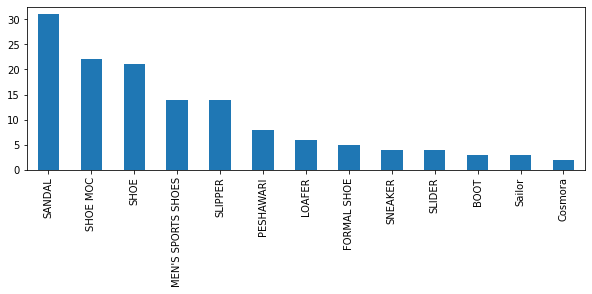

In [105]:
df1['Category'].value_counts()[:13].plot.bar(figsize=(10,3))

In [107]:
df1.to_csv("transformed_urbansole_dataset_scraped.csv", index=False)

In [127]:
df.groupby('Category').size().sort_values(ascending=False)[:12]

Category
SANDAL                31
SHOE MOC              22
SHOE                  21
SLIPPER               14
MEN'S SPORTS SHOES    14
PESHAWARI              8
LOAFER                 6
FORMAL SHOE            5
SNEAKER                4
SLIDER                 4
BOOT                   3
Sailor                 3
dtype: int64

In [112]:
content = requests.get(products_links[0], headers=headers)

In [113]:
soup = BeautifulSoup(content.content, 'html.parser')

In [18]:
all_shops = soup.find_all('li', class_="productgrid--item")
len(all_shops)

48

In [117]:
div = soup.find('div', class_="product-gallery--image-background")
print(div.find('img').get('src'))
# ahref = soup.find_all('a', class_="productitem--image-link")
# print(ahref)

//www.urbansole.com.pk/cdn/shop/files/US-EX-3253Grey_700x700.webp?v=1704739341


In [120]:
from PIL import Image
from io import BytesIO
def download_image():
    image_url = "https://www.urbansole.com.pk/cdn/shop/files/US-EX-3253Grey_700x700.webp?v=1704739341"
    local_path = "US-EX-3253Grey_700x700.png"
    response = requests.get(image_url, headers=headers)
    if response.status_code == 200:
        image = Image.open(BytesIO(response.content))
        image.save(local_path, 'PNG')
        print(f"Image downloaded and saved to {local_path}")
    else:
        print(f"Failed to download image. Status code: {response.status_code}")


Image downloaded and saved to US-EX-3253Grey_700x700.png
